<h1>Predictions of House Prices<h1>

Environments:

flask==2.1.2

seaborn==0.11.2

sklearn==0.0

sklearn_features==0.0.2

xgboost==1.6.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import missingno

In [ ]:
File_Path = os.path.join(os.getcwd(),'housing.csv')
df = pd.read_csv(File_Path)
df.shape

(20640, 10)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
## Check some info about the Dataset to (see nulls and DataTypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
## Show some statistics about the Dataset
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
## Check the nulls
df.isna().sum() # by defult axis=0(columns)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

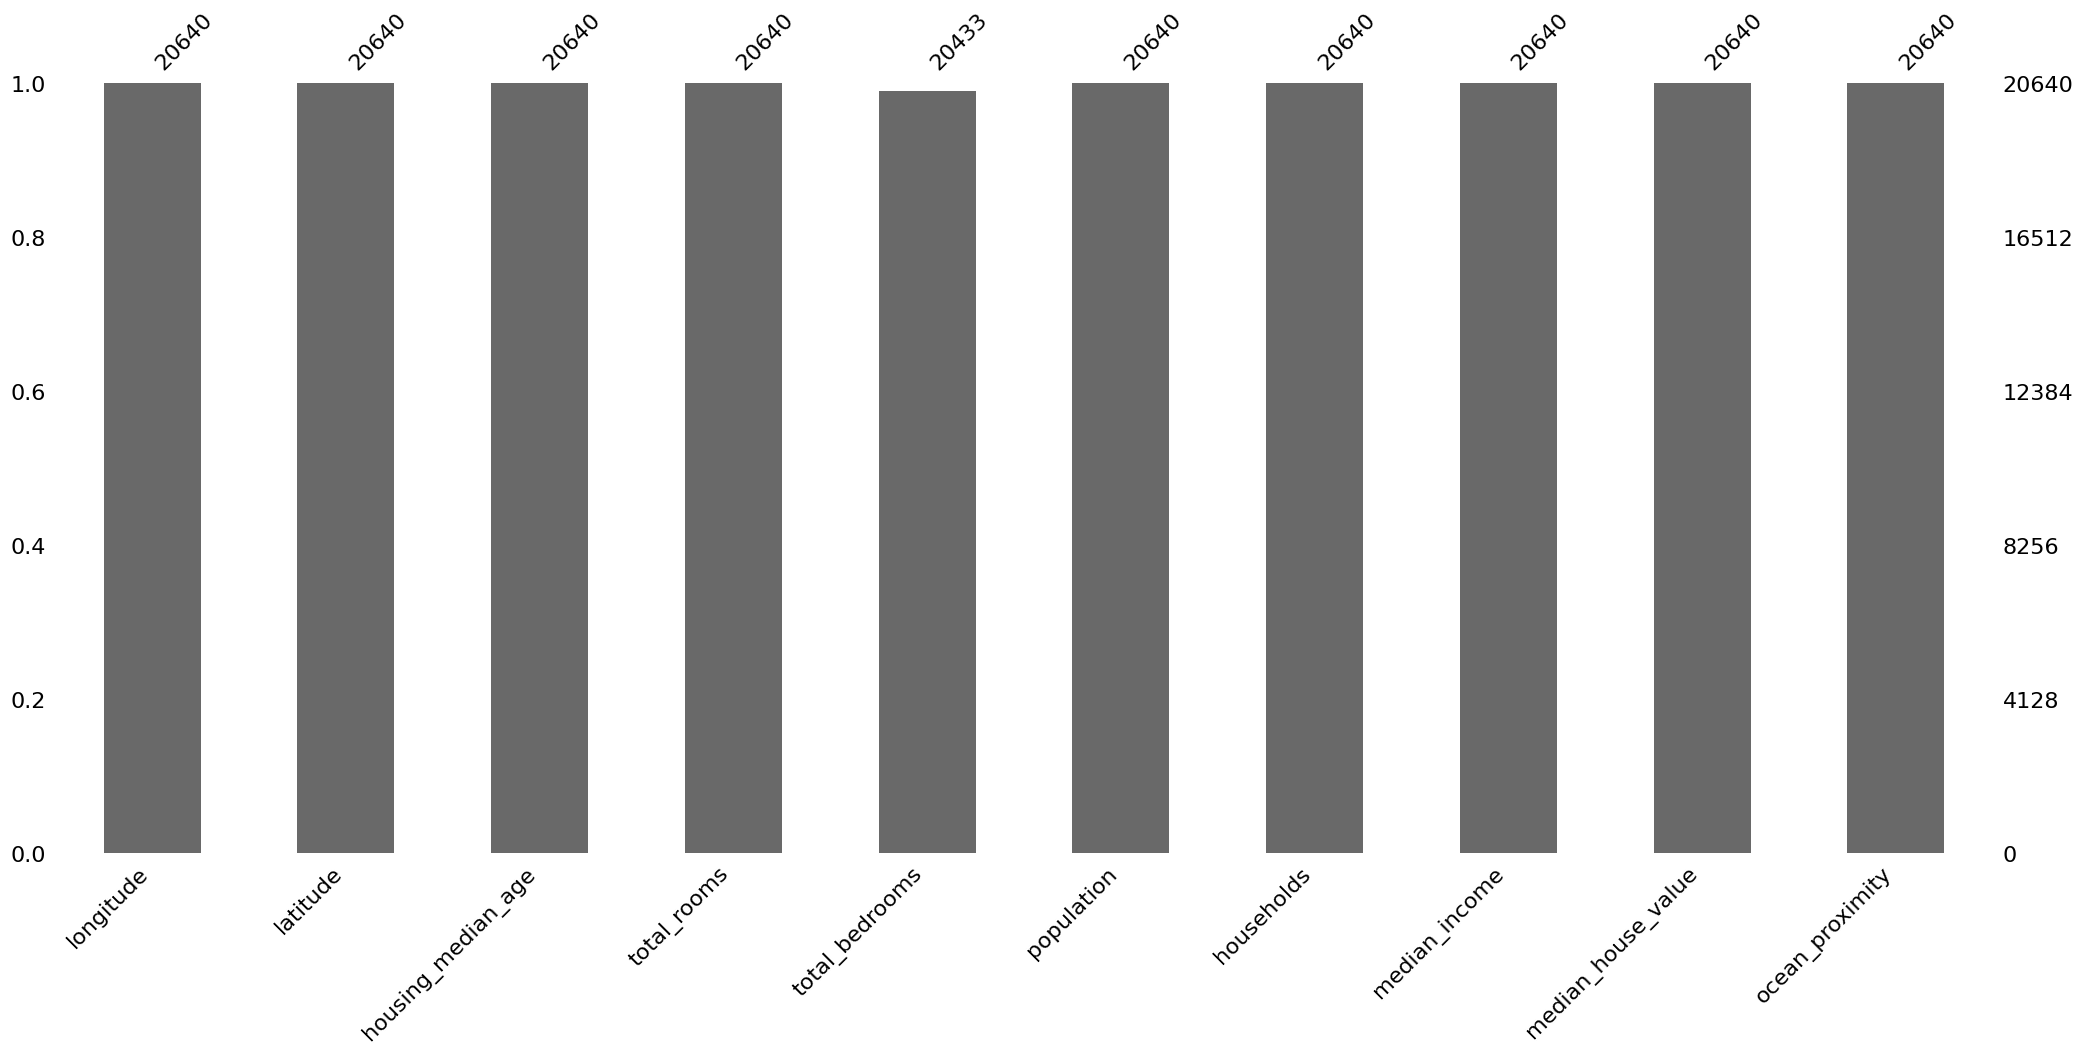

In [ ]:
## check nulls using (missingno) library -- take care of the sum of above each bar
missingno.bar(df)

<Axes: >

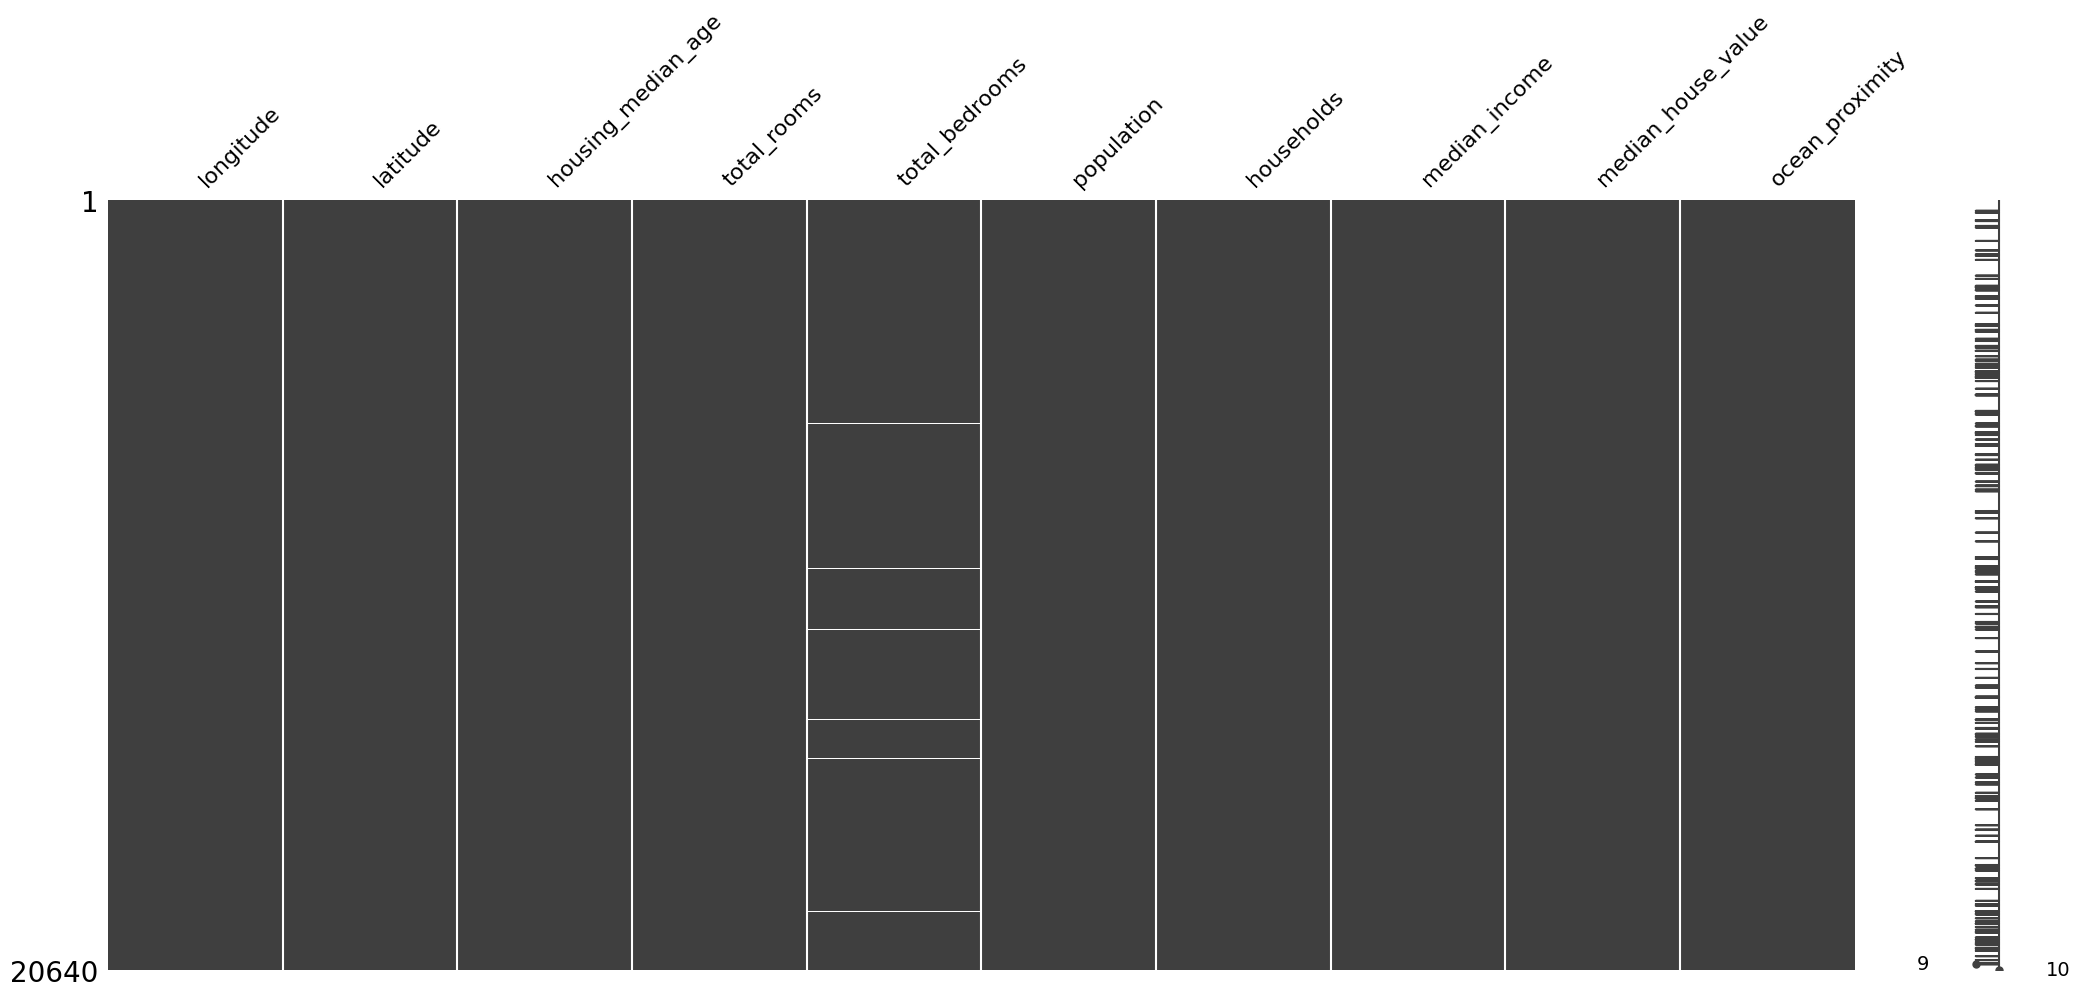

In [ ]:
missingno.matrix(df)

In [ ]:
### Check the Distribution of (ocean_proximity) Feature in Dataset
ocean_values = df['ocean_proximity'].value_counts()
print('categories of (ocean_proximity) --- \n', ocean_values)

categories of (ocean_proximity) --- 
 <1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [ ]:
df['ocean_proximity'].value_counts().index

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<Axes: xlabel='ocean_proximity', ylabel='count'>

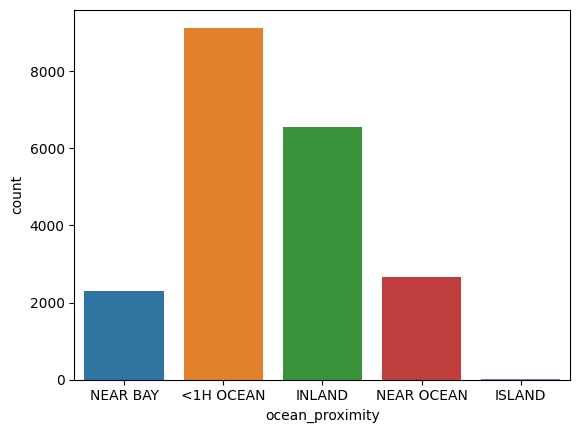

In [ ]:
# Plotting
sns.countplot(x='ocean_proximity',data=df)

<Axes: xlabel='ocean_proximity', ylabel='count'>

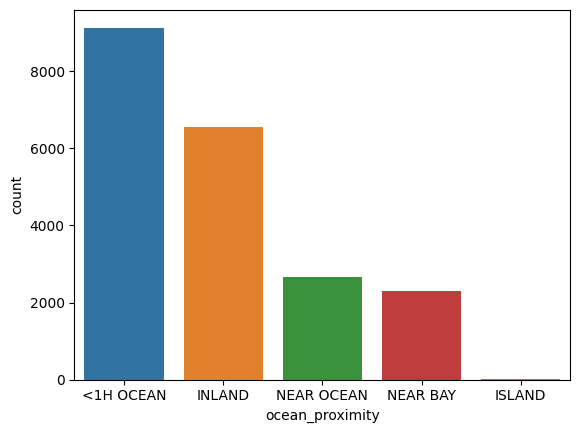

In [ ]:
# Plotting
sns.countplot(x='ocean_proximity',data=df , order=['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND'])

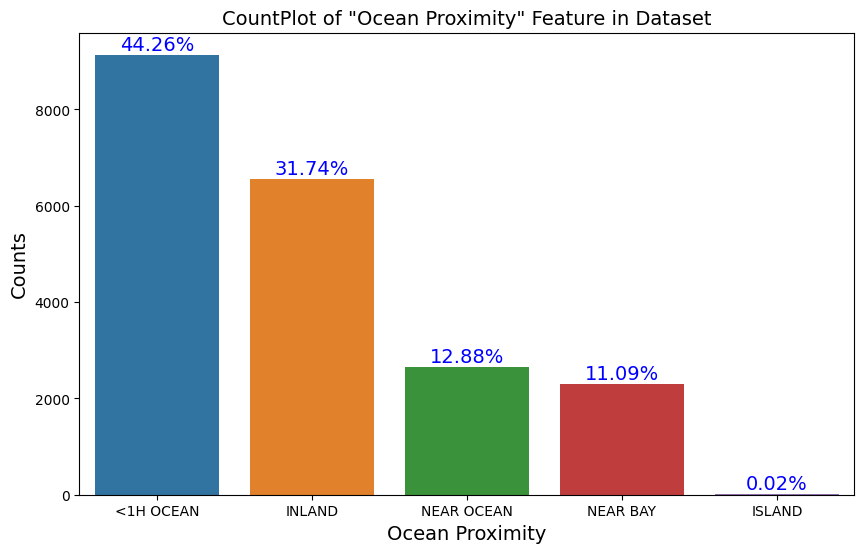

In [ ]:
## Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df, order=ocean_values.index)
plt.title('CountPlot of "Ocean Proximity" Feature in Dataset', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k') # c:color = k:blak
plt.ylabel('Counts', fontsize=14, c='k')

## To show the percentage of each bar
for i in range(len(ocean_values)):  ## loop over the numbers of categories (number of bars)
    each_count = ocean_values.values[i]
    each_text = f'{((100*each_count)/ len(df)):.2f}%'
    plt.text(x=i, y=each_count+100, s=each_text, c='b', fontsize=14, ha='center') # x & y : location to the text ... s:what do you write

In [ ]:
## Replace the  (<1H OCEAN) to (1H OCEAN) -- will cause ane errors in Deploymnet
df['ocean_proximity'] = df['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')

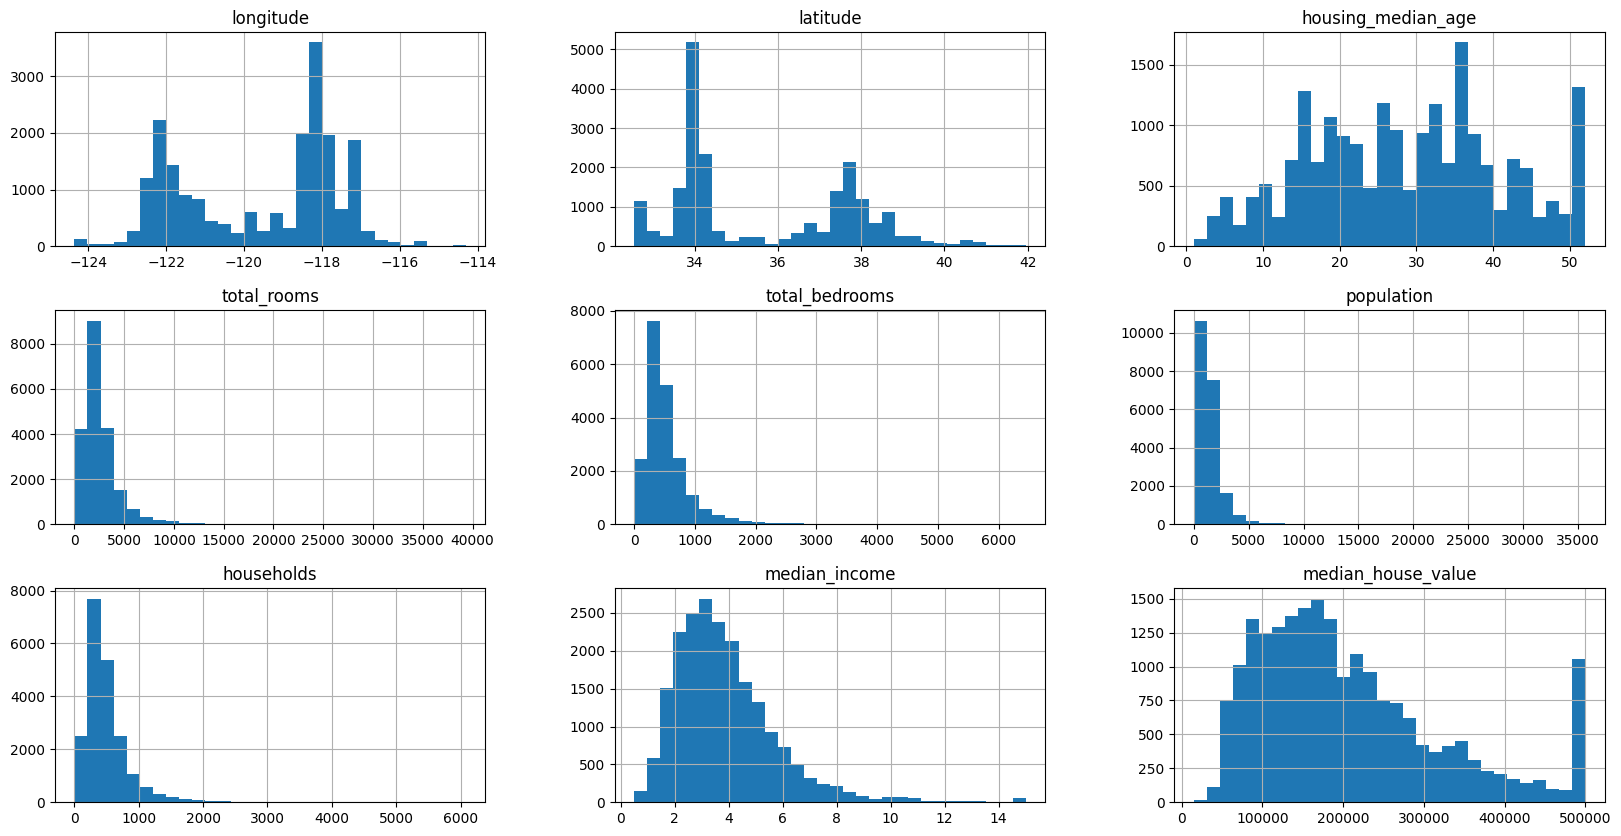

In [ ]:
## Histogram Distr. of Numerical Features in Dataset
df.hist(bins=30, figsize=(20, 10))
plt.show()

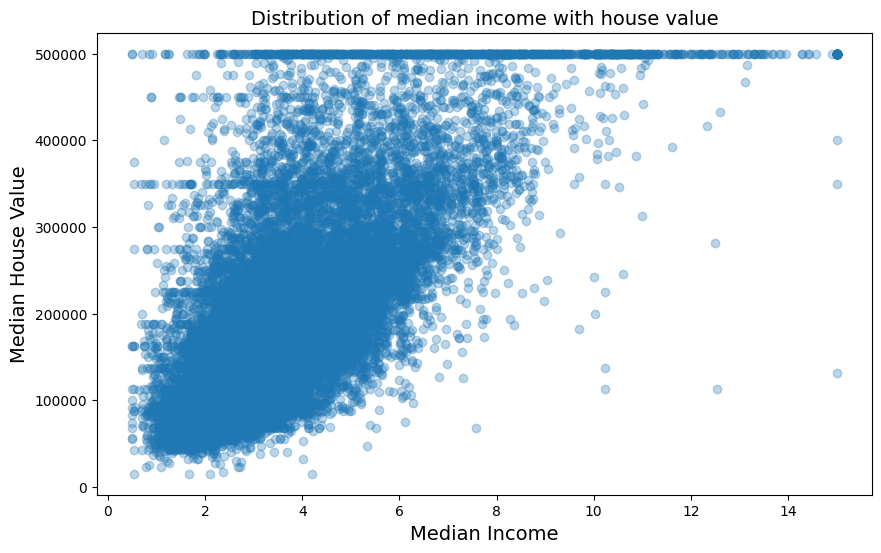

In [ ]:
## Scatterplot with important Feature (medina_income) with the target (median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.3)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

In [ ]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
house_value_bins = pd.cut(x=df['median_house_value'],bins=[-np.inf,100000,200000,300000,400000,500000,np.inf],
                          labels=['0-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k<'])
house_value_bins

0        400k-500k
1        300k-400k
2        300k-400k
3        300k-400k
4        300k-400k
           ...    
20635       0-100k
20636       0-100k
20637       0-100k
20638       0-100k
20639       0-100k
Name: median_house_value, Length: 20640, dtype: category
Categories (6, object): ['0-100k' < '100k-200k' < '200k-300k' < '300k-400k' < '400k-500k' < '500k<']

In [ ]:
df['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
house_value_bins.unique()

['400k-500k', '300k-400k', '200k-300k', '100k-200k', '0-100k', '500k<']
Categories (6, object): ['0-100k' < '100k-200k' < '200k-300k' < '300k-400k' < '400k-500k' < '500k<']

In [ ]:
house_value_bins.value_counts()

100k-200k    8273
200k-300k    4873
0-100k       3658
300k-400k    2092
500k<         965
400k-500k     779
Name: median_house_value, dtype: int64

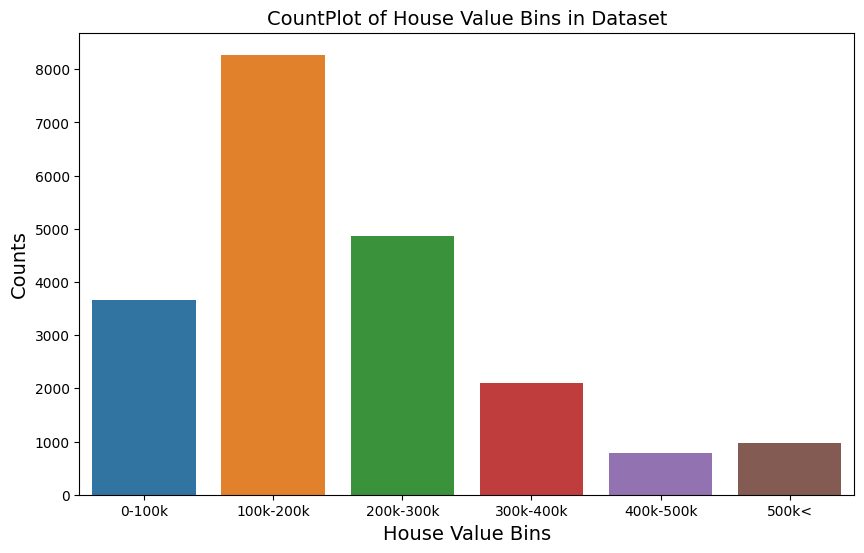

In [ ]:
## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

In [ ]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [ ]:
## Let's try the same above code for (median_income), I think it is very important Feature
income_bins = pd.cut(x=df['median_income'],
                     bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf],
                     labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])
income_bins

0           6<
1           6<
2           6<
3        4.5-6
4        3-4.5
         ...  
20635    1.5-3
20636    1.5-3
20637    1.5-3
20638    1.5-3
20639    1.5-3
Name: median_income, Length: 20640, dtype: category
Categories (5, object): ['0-1.5' < '1.5-3' < '3-4.5' < '4.5-6' < '6<']

In [ ]:
df['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

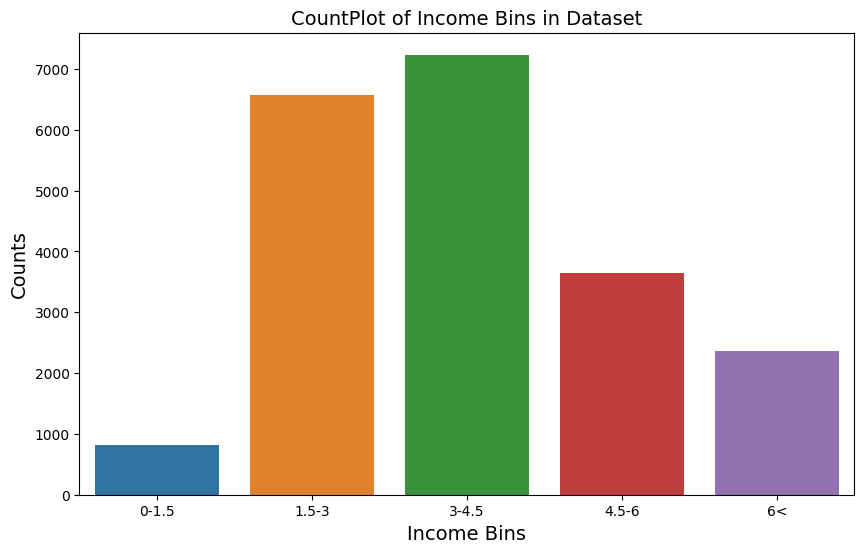

In [ ]:
## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

<h3>Bivariate Visualization<h3>

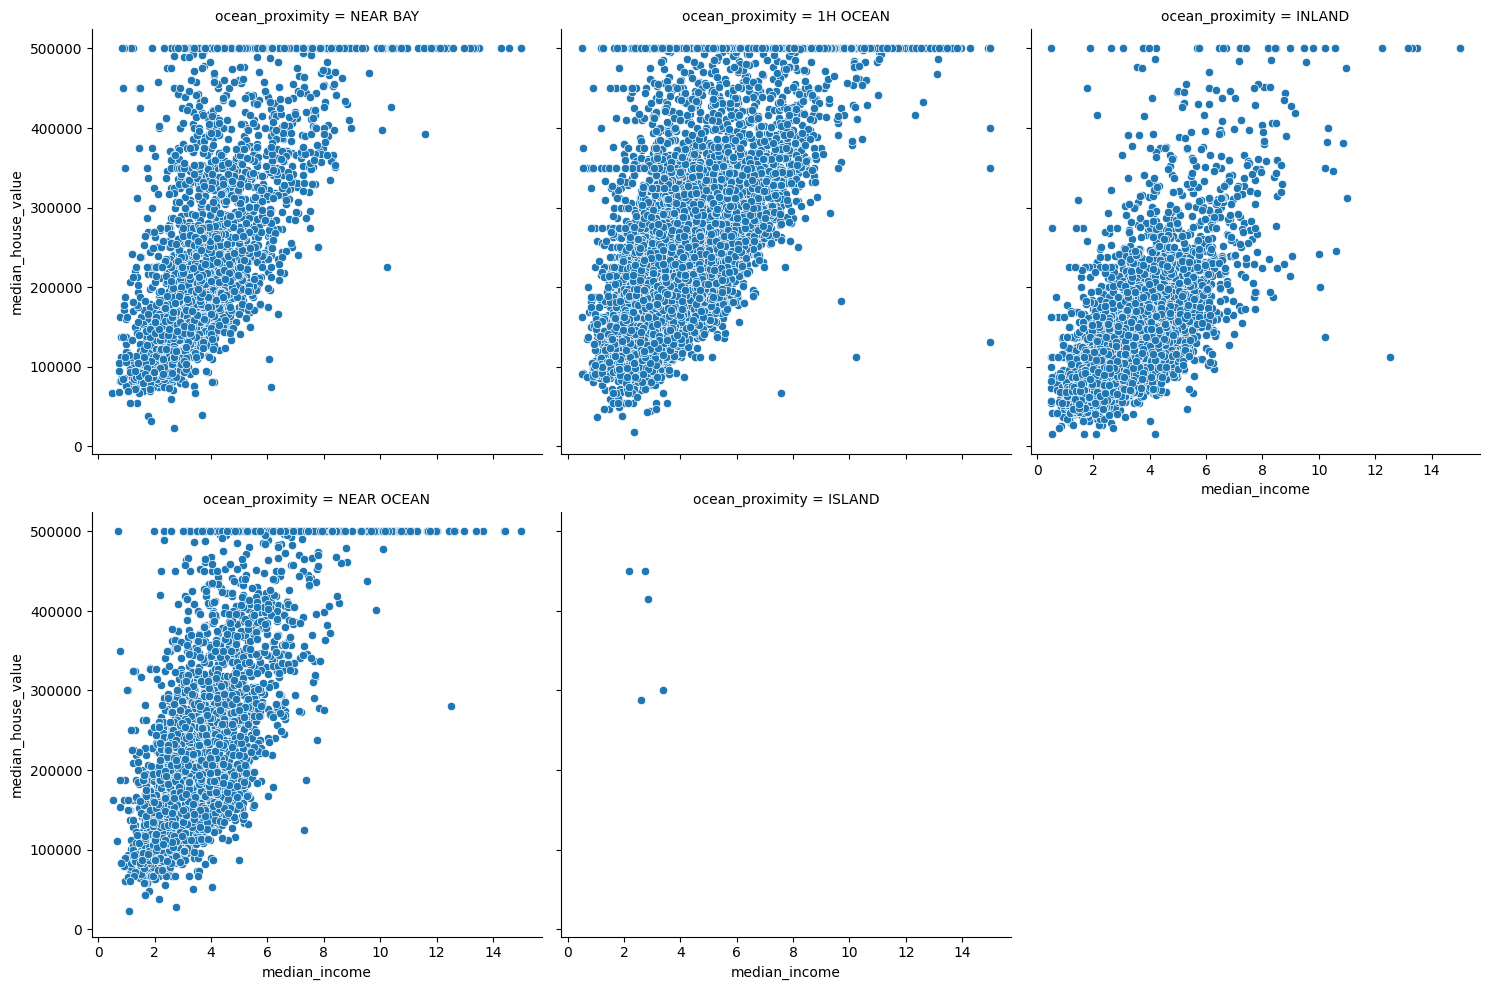

In [ ]:
## Scatterplot with (median_income) & (median_house_value) at each (ocean_proximity)
sns.relplot(x='median_income', y='median_house_value', data=df, kind='scatter',
            col='ocean_proximity', col_wrap=3)
plt.show()

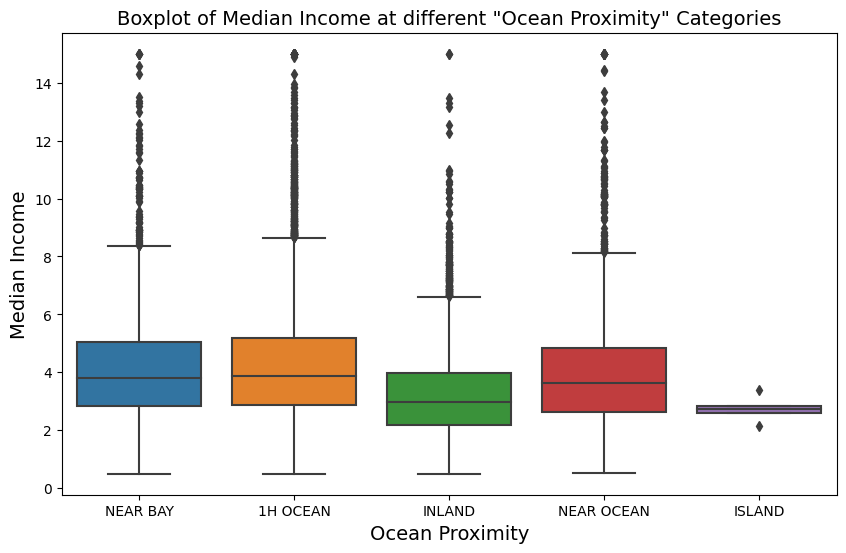

In [ ]:
## Check the BoxPlot of the (median_income) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_income', data=df, x='ocean_proximity') # x : the feature in x ... y : the feature in y
plt.title('Boxplot of Median Income at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

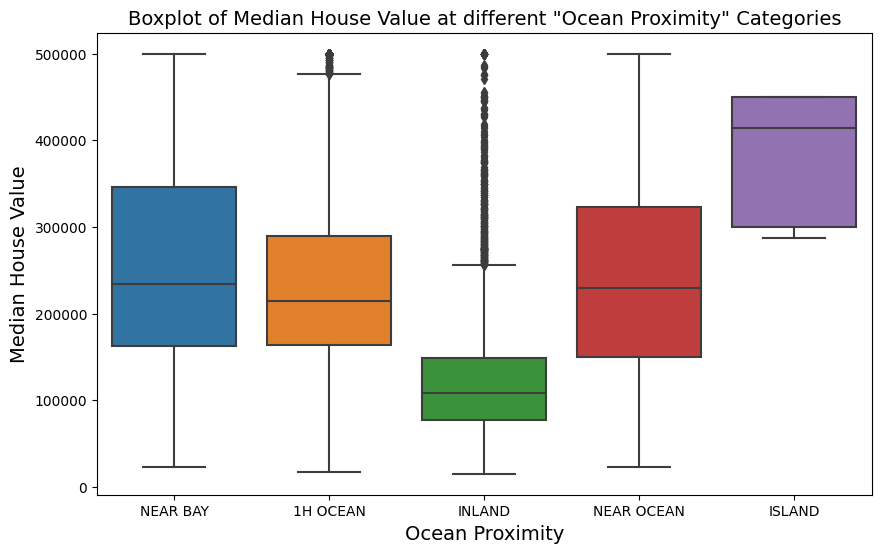

In [ ]:
## Check the BoxPlot for (median_house_value) at different Categories of (ocean_proximity)
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_house_value', data=df, x='ocean_proximity')
plt.title('Boxplot of Median House Value at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()
# It seems that the Distribution of median_income is almost the same at ocean_proximity categories, Also, it seems that the INLAND median_income and median_house value is less than other categories and it makes sense

<h3>Mulivariate Visualization<h3>

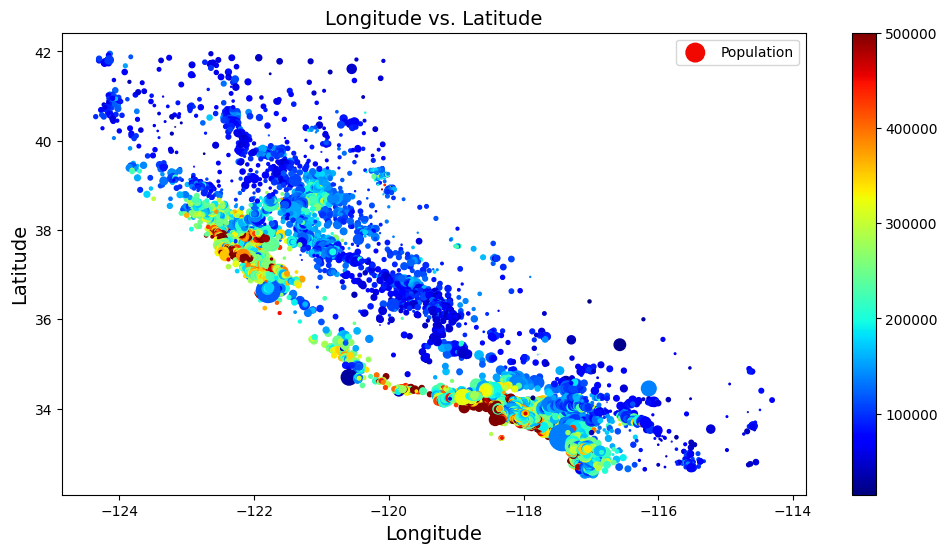

In [ ]:
## ScatterPlot for (longitude & Latitude), and add (population) as size of point, and the color as (median_house_value)
plt.figure(figsize=(12, 6))
sc = plt.scatter(x=df['longitude'], y=df['latitude'],
                 s=df['population']/100, c=df['median_house_value'], # s:size , c:color
                 cmap=plt.get_cmap('jet'), label='Population') #cmap:color_map
plt.colorbar(sc)   ## colorbar
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()
# It seems that prices is higher near the ocean than other zones, and also these araes have higher population

In [ ]:
# Check the Correlation between the Features and Target
## Using pearson correlation
df.corr()['median_house_value'].sort_values(ascending=False)

<ipython-input-32-f79eac77fdb8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<ipython-input-33-7e97233bad82>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f')  ## symmetric matrix


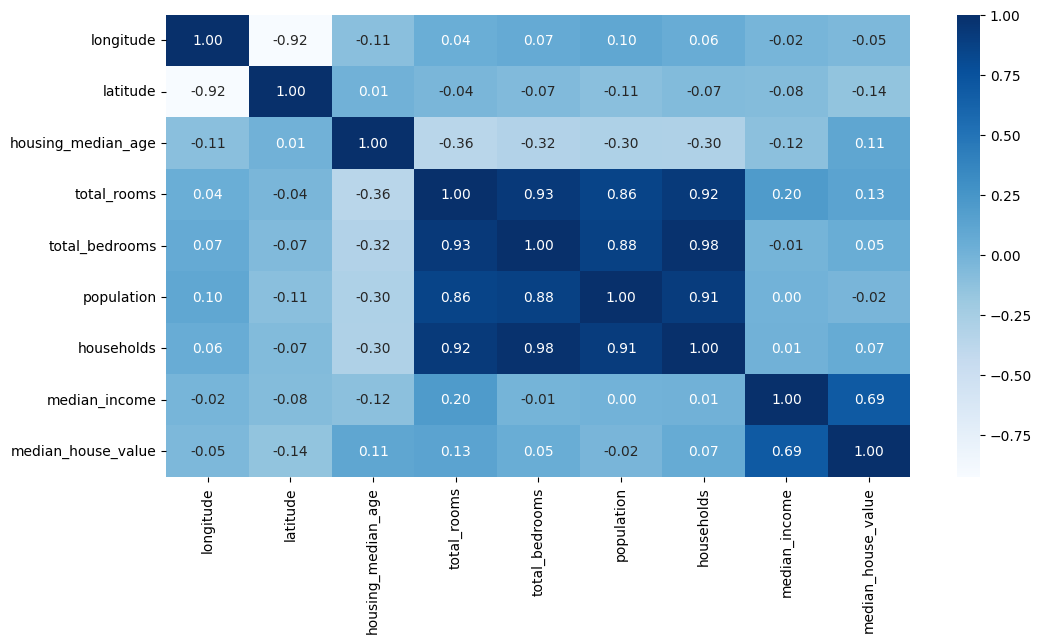

In [ ]:
## you can show this as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt='.2f')  ## symmetric matrix
plt.show()
# It seems that the most correlated Feature with target is (median_income) as I predict that, and feature like (households & population) are less correlated

In [ ]:
# Feature Engineering
# Try to add some features, thinking that it will be more useful and more correlated to the target
## Try to make some Feature Engineering --> Feature Extraction --> Add the new column to the main DF
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedroms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [ ]:
## check the correlation again
df.corr()['median_house_value'].sort_values(ascending=False)  ## some progress for out new features (very good)

<ipython-input-35-757ecea97ac6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['median_house_value'].sort_values(ascending=False)  ## some progress for out new features (very good)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedroms_per_rooms          -0.255880
Name: median_house_value, dtype: float64

In [ ]:
# Split the Dataset
## Split the whole Dataset to Feature & Target
X = df.drop(columns=['median_house_value'], axis=1)   ## Features
y = df['median_house_value']   ## target

In [ ]:
## Random split the dataset to two sets (train_set, test_set)
## For validation ---  I will use Cross Validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)

## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (17544, 12)
y_train shape --  (17544,)
X_test shape --  (3096, 12)
y_test shape --  (3096,)


Notes in sklearn, Read Crarefully:

.fit --> means that the instance you created is trying to learn or train

.transform --> means that the instance you created has learned and now time to apply what it learned by trasnforming

.fit_transform --> means the two above steps in one step, and don't use this method except with training data
We fit to train the data, and after it learns we transform (train, valid, test)

In other meaning --> (.fit) then (.transform) to training data or (fit_transform) in one step

In other meaning --> only (.transform) to other data after learing to training data

In [ ]:
# Dealing with nulls
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]


print('Numerical Columns : \n', num_cols)
print('**'*40)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']
********************************************************************************
Categorical Columns : 
 ['ocean_proximity']


<h3>**************************************************************<h3>

In [ ]:
## What about imputing the null using (median) ---> Using SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')   ## Intialization
imputer.fit(X_train[num_cols])   ## learn

## Transform
X_train_filled = imputer.transform(X_train[num_cols])
X_test_filled = imputer.transform(X_test[num_cols])

In [ ]:
imputer.statistics_

array([-1.18510000e+02,  3.42650000e+01,  2.90000000e+01,  2.13100000e+03,
        4.37000000e+02,  1.16800000e+03,  4.10500000e+02,  3.54090000e+00,
        5.23456397e+00,  2.02876796e-01,  2.81793691e+00])

In [ ]:
X_train[num_cols].median(axis=0)

longitude                   -118.510000
latitude                      34.265000
housing_median_age            29.000000
total_rooms                 2131.000000
total_bedrooms               437.000000
population                  1168.000000
households                   410.500000
median_income                  3.540900
rooms_per_household            5.234564
bedroms_per_rooms              0.202877
population_per_household       2.817937
dtype: float64

In [ ]:
# Standardize the Features
## using StandardScaler for each Feature to be (mean=0, std=1)
## This techniques helps for better training and to converge faster and put all features in the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  ## define an instance

## Learn and Transform in one step for train set , and transform only for test set
X_train_scaled = scaler.fit_transform(X_train_filled)  ## train
X_test_scaled = scaler.transform(X_test_filled)  ## test

In [ ]:
# Pipeline for Numerical Features -- I will use it in this Project
# Building a pipeline is much easier and better while inference at new dataset
from sklearn.pipeline import Pipeline
## Building a pipeline for numerical variables
num_pipeline = Pipeline(steps=[
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                              ]
                       )
## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_num = num_pipeline.fit_transform(X_train[num_cols])  ## train
X_test_num = num_pipeline.transform(X_test[num_cols])  ## test

Categorical Features

Categorical Features should be encoed before being passed to the Model, there are more than one type of encoding

Label Encoding: mapping categories to numbers start from 0 to the length of categories and map these values in one column

Ordinal Encoding: mapping ordinal categories start from 0 to the length of categories but orderd 0<1<2 ...

OHE = One Hot Encoding: mapped to multiple columns, column for each category, each column contains ones when this category is mentioned

In [ ]:
## Let's use here for (ocean_proximity) --> use LabelEncoder (Try to use OHE)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lbl_encoder = LabelEncoder()    ## define an instance
X_train_encoded = lbl_encoder.fit_transform(np.squeeze(X_train[categ_cols].values))  ## learn and transform for train

X_test_encoded = lbl_encoder.transform(np.squeeze(X_test[categ_cols].values))  ## transform only for test

In [ ]:
# One_hot_Encoder
ohe = OneHotEncoder()
ohe.fit(X_train[categ_cols].values)
X_train_encoded = ohe.fit_transform(X_train[categ_cols].values)
X_test_encoded = ohe.transform(X_test[categ_cols].values)

X_train_encoded # try
X_train_encoded.toarray() # try
ohe = OneHotEncoder(sparse=False) # OR

In [ ]:
# Pipeline for Categorical Features -- I will use it in this Project
# Use OHE -> it is preferable to use OHE when encoding for Features,
# But if you are encoding the Target, you MUST encode using LabelEncoder, except in Deep Learning we can use OHE for target, but for now, you can use LabelEncoder or OrdinalEncoder or OneHotEncoder for Features and only LabelEncoder for target --- take care of this Note
## Define pipeline for categorical columns --> use OneHotEncoder = OHE
categ_pipeline = Pipeline(steps=[
                                ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                ('OHE', OneHotEncoder(sparse=False))
                                ]
                         )

## deal with (categ_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_categ = categ_pipeline.fit_transform(X_train[categ_cols])
X_test_categ = categ_pipeline.transform(X_test[categ_cols])  ## much easier and much better

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<h3>**************************************************************<h3>

Get all Together

Now we have outputs from Numerical Pipeline and Cateforical Pipeline

We have two solutions:

Conactenate the Features (Numerical after processing) and (Encoded Categorical)

You can use (FeatureUnion or ColumnTransformer) provided in sklearn

In [ ]:
! pip install sklearn_features

In [ ]:
## We can get much much easier like the following
## numerical pipeline
from sklearn_features.transformers import DataFrameSelector
from sklearn.pipeline import FeatureUnion,Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                        ])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                            ('num_pipe', num_pipeline),
                                            ('categ_pipe', categ_pipeline)
                                               ]
                             )
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_final.shape , X_test_final.shape , y_train.shape , y_test.shape

((17544, 16), (3096, 16), (17544,), (3096,))

<h2>Building ML Models

Evaluation Metric: RMSE<h2>

<h3>1. LinearRegression<h3>

In [ ]:
## LinearRegression -- Regression using Ordinary Least Squares (OLS) Method

## define the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)  ## train

LinearRegression()

In [ ]:
lin_reg.coef_ # Weights for each features(16)

array([-56184.04000997, -56481.67278334,  13865.47497456,   6121.36866331,
         8917.83877966, -46640.74395353,  36635.13814887,  79167.50957127,
         6353.87452105,  16581.11317897,    703.20742147, -22049.31963557,
       -56524.85301347, 124491.42764171, -27569.68606494, -18347.56892772])

In [ ]:
lin_reg.intercept_ # intercept_(b) -> b + w1x1 + w2x2 + ...

239967.57074164553

In [ ]:
y_pred = lin_reg.predict(total_pipeline.transform(X_test))
y_pred

array([ 37445.08114237, 136009.91423567, 288664.98306179, ...,
       228491.13650271, 217856.48237351, 175678.50022053])

In [ ]:
y_pred.shape

(3096,)

In [ ]:
## Check scores of this Model (RMSE) using (cross_val_score)
from sklearn.model_selection import cross_val_score # cv:iterations  .... n_jobs:num of core in your device
rmse_scores_lin = cross_val_score(estimator=lin_reg, X=X_train_final, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_lin = -1 * rmse_scores_lin   ## we want it positive
rmse_scores_lin = np.sqrt(rmse_scores_lin)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_lin, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_lin.mean():.4f}')

RMSE Scores Using LinearRegression --- [66469.8275 69222.723  66338.7127 67047.6716 70321.7781]
Mean of RMSE Scores Using LinearRegression --- 67880.1426


In [ ]:
## Get Prediction using (cross_val_predict)
from sklearn.model_selection import cross_val_predict
y_pred_lin = cross_val_predict(estimator=lin_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
y_pred_lin

array([184295.23244419, 230100.88200316, 145096.2664977 , ...,
       195094.05173242, 278871.44475451, 272476.85764427])

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,y_pred_lin))

67898.88872785706

In [ ]:
y_pred_lin.shape , y_test.shape,y_train.shape

((17544,), (3096,), (17544,))

In [ ]:
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
from sklearn.metrics import mean_squared_error
rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')  ## almost the same result :D

RMSE after prediction Using LinearRegression --- 67898.8887


<h3>2. SGDRegressor
(Stochastic gradient descent)<h3>

In [ ]:
## define the model --> ## initialize some random Hyperparameter --> we will tune later
from sklearn.linear_model import SGDRegressor # eta0:learning rate
sgd_reg = SGDRegressor(penalty='l2', alpha=0.0001, eta0=0.001, shuffle=True, max_iter=10000)  ## with Regularization
sgd_reg.fit(X_train_final, y_train)  ## train the model

SGDRegressor(eta0=0.001, max_iter=10000)

In [ ]:
## Check scores of this Model (RMSE) using (cross_val_score)
from sklearn.model_selection import cross_val_score
rmse_scores_sgd = cross_val_score(estimator=sgd_reg, X=X_train_final, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_sgd = -1 * rmse_scores_sgd   ## we want it positive
rmse_scores_sgd = np.sqrt(rmse_scores_sgd)
print(f'RMSE Scores Using SGDRegressor --- {np.round(rmse_scores_sgd, 4)}')
print(f'Mean of RMSE Scores Using SGDRegressor --- {rmse_scores_sgd.mean():.4f}')

RMSE Scores Using SGDRegressor --- [66720.8502 69272.2048 66583.4126 67048.7703 70348.1343]
Mean of RMSE Scores Using SGDRegressor --- 67994.6744


In [ ]:
## Get Prediction using (cross_val_predict)
from sklearn.model_selection import cross_val_predict
y_pred_sgd = cross_val_predict(estimator=sgd_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
y_pred_sgd

array([180040.48840623, 231472.71447395, 144152.66872975, ...,
       195442.88424937, 278981.51613738, 271695.48031902])

In [ ]:
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
from sklearn.metrics import mean_squared_error
rmse_pred_sgd = np.sqrt(mean_squared_error(y_train, y_pred_sgd))
print(f'RMSE after prediction Using SGDRegressor --- {rmse_pred_sgd:.4f}')  ## almost the same result :D

RMSE after prediction Using SGDRegressor --- 67994.7210


<h3>3. Ridge

Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L2-Norm)<h3>

In [ ]:
## Define Ridge Model (Regularized Version of LinearRegression)
from sklearn.linear_model import Ridge
# alpha:regularization hyper parameter
ridge_reg = Ridge(alpha=0.9, solver='cholesky')
ridge_reg.fit(X_train_final, y_train)  ## train the model

Ridge(alpha=0.9, solver='cholesky')

In [ ]:
## Check scores of this Model (RMSE) using (cross_val_score)
from sklearn.model_selection import cross_val_score
rmse_scores_ridge = cross_val_score(estimator=ridge_reg, X=X_train_final, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_ridge = -1 * rmse_scores_ridge   ## we want it positive
rmse_scores_ridge = np.sqrt(rmse_scores_ridge)
print(f'RMSE Scores Using Ridge --- {np.round(rmse_scores_ridge, 4)}')
print(f'Mean of RMSE Scores Using Ridge --- {rmse_scores_ridge.mean():.4f}')

RMSE Scores Using Ridge --- [66472.689  69222.7453 66350.7247 67031.9174 70323.0198]
Mean of RMSE Scores Using Ridge --- 67880.2192


In [ ]:
## Get Prediction using (cross_val_predict)
from sklearn.model_selection import cross_val_predict
y_pred_ridge = cross_val_predict(estimator=ridge_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
y_pred_ridge

array([184251.80264792, 230123.12466144, 145102.35346503, ...,
       195115.87719925, 278855.5714773 , 272456.8636632 ])

In [ ]:
## take care of this point --> don't use .predict when you are using (crossValidation)
from sklearn.metrics import mean_squared_error
rmse_pred_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print(f'RMSE after prediction Using Ridge --- {rmse_pred_ridge:.4f}')  ## almost the same result :D

RMSE after prediction Using Ridge --- 67898.9471


<h3>4. Lasso

Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L1-Norm)<h3>

In [ ]:
## Define Lasso Model (Regularized Version of LinearRegression)
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1, max_iter=100000)
lasso_reg.fit(X_train_final, y_train)  ## train the model   and try predictions in the same way

Lasso(alpha=1, max_iter=100000)

In [ ]:
## check the weights using Lasso, and Ridge --- Lasso is a Features Selection or Feature Important Model ? why?
lasso_reg.coef_
# so if the feature weight = 0 then this feature useless(we do not need it)

array([-56166.28650229, -56466.30701119,  13864.90232431,   6112.77503543,
         8937.16731622, -46626.84295639,  36609.7003318 ,  79167.88726091,
         6350.89510096,  16578.08308073,    700.82893968,      0.        ,
       -34479.90501045, 143036.55857524,  -5501.79735044,   3698.19799083])

<h3>5. ElasticNet

Regression using Ordinary Least Squares, but regularized version of LinearRegression using both (L1-Norm & L2-Norm)<h3>

In [ ]:
## Define ElasticNet Model (Regularized Version of LinearRegression)
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X_train_final, y_train)  ## train the model   and try predictions in the same way

ElasticNet(alpha=0.1)

<h3>6. PolynomialRegression<h3>

In [ ]:
## We can try use PolynomialRegression
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2, include_bias=False)   ## try random degrees, MUST be tuned
X_train_poly = poly_feat.fit_transform(X_train_final)

In [ ]:
X_train_final.shape , X_train_poly.shape

((17544, 16), (17544, 152))

In [ ]:
# #_of_new_features = (n+d)!/n!*d! ... n(num_of_old_features) ...d(num_of_degree)
num_of_new_features = np.math.factorial(16+2)/(np.math.factorial(16)*np.math.factorial(2))
num_of_new_features # so 153 and we do not need take the bais (include_bias=Fales) so 153-1=152

153.0

In [ ]:
## Pass the above new poly Features to the Model -- bias is included in Model itself -- don't add it twice
from sklearn.linear_model import LinearRegression
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
## Check scores of this Model (RMSE) using (cross_val_score)
from sklearn.model_selection import cross_val_score
rmse_scores_poly = cross_val_score(estimator=lin_reg_poly, X=X_train_final, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_poly = -1 * rmse_scores_poly   ## we want it positive
rmse_scores_poly = np.sqrt(rmse_scores_poly)
print(f'RMSE Scores Using PolynomialRegression --- {np.round(rmse_scores_poly, 4)}')
print(f'Mean of RMSE Scores Using PolynomialRegression --- {rmse_scores_poly.mean():.4f}')

RMSE Scores Using PolynomialRegression --- [66469.8275 69222.723  66338.7127 67047.6716 70321.7781]
Mean of RMSE Scores Using PolynomialRegression --- 67880.1426


In [ ]:
from sklearn.model_selection import cross_val_predict
## Get Prediction using (cross_val_predict)
y_pred_poly = cross_val_predict(estimator=lin_reg_poly, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_poly = np.sqrt(mean_squared_error(y_train, y_pred_poly))
print(f'RMSE after prediction Using PolynomialRegression --- {rmse_pred_poly:.4f}')  ## almost the same result :D

RMSE after prediction Using PolynomialRegression --- 67898.8887


<h3>7. KNN<h3>

In [ ]:
## Using KNN, Low n_neighbors -> Overfitting &  High n_neighbors ->  Underfitting
from sklearn.neighbors import KNeighborsRegressor
# p=2(Encludin distance) ...p=1(Manhaten distance)
knn_reg = KNeighborsRegressor(n_neighbors=8, p=2,  metric='minkowski', weights='uniform')
knn_reg.fit(X_train_final, y_train)  ## train the model

KNeighborsRegressor(n_neighbors=8)

In [ ]:
## Check scores of this Model (RMSE) using (cross_val_score)
from sklearn.model_selection import cross_val_score
rmse_scores_knn = cross_val_score(estimator=knn_reg, X=X_train_final, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_knn = -1 * rmse_scores_knn   ## we want it positive
rmse_scores_knn = np.sqrt(rmse_scores_knn)
print(f'RMSE Scores Using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f'Mean of RMSE Scores Using KNN --- {rmse_scores_knn.mean():.4f}')

RMSE Scores Using KNN --- [60978.9699 61687.7848 60277.5273 59442.3636 62191.8308]
Mean of RMSE Scores Using KNN --- 60915.6953


In [ ]:
## Get Prediction using (cross_val_predict)
from sklearn.model_selection import cross_val_predict
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction Using KNN --- {rmse_pred_knn:.4f}')  ## almost the same result :D

RMSE after prediction Using KNN --- 60923.5123


<h3>
8. RandomForest<h3>

In [ ]:
## Using RF ---> A lot of Hyperparams but the Dominant (n_estimators, max_depth)
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1)
forest_reg.fit(X_train_final, y_train)  ## train

In [ ]:
## Check scores of this Model (RMSE) using (cross_val_score)
from sklearn.model_selection import cross_val_score
rmse_scores_forest = cross_val_score(estimator=forest_reg, X=X_train_final, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_forest = -1 * rmse_scores_forest   ## we want it positive
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest --- {rmse_scores_forest.mean():.4f}')

In [ ]:
## Get Prediction using (cross_val_predict)
from sklearn.model_selection import cross_val_predict
y_pred_forest = cross_val_predict(estimator=forest_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}')  ## almost the same result :D

<h4>RF Tuning<h4>

In [ ]:
## Using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
params_best_forest = {'n_estimators': np.arange(100, 500, 50),
                      'max_depth': np.arange(4, 20, 2),
                      'max_samples': [0.7, 0.8, 0.9, 1]}

## Intialize
search_random_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=params_best_forest,
                                          n_iter=20, scoring='neg_mean_squared_error',
                                          cv=5, verbose=6, random_state=422)
search_random_forest.fit(X_train_final, y_train)

In [ ]:
## Get the best Params
best_foresr_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_foresr_params)

## Get the best estimator
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

In [ ]:
## Check scores of this Model (RMSE) using (cross_val_score)
from sklearn.model_selection import cross_val_score
rmse_scores_tuned_forest = cross_val_score(estimator=best_forest, X=X_train_final, y=y_train,
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_forest = -1 * rmse_scores_tuned_forest   ## we want it positive
rmse_scores_tuned_forest = np.sqrt(rmse_scores_tuned_forest)
print(f'RMSE Scores Using Tuned RandomForest --- {np.round(rmse_scores_tuned_forest, 4)}')
print(f'Mean of RMSE Scores Using Tuned RandomForest --- {rmse_scores_tuned_forest.mean():.4f}')

In [ ]:
## Get Prediction using (cross_val_predict)
from sklearn.model_selection import cross_val_predict
y_pred_tuned_forest = cross_val_predict(estimator=best_forest, X=X_train_final, y=y_train, cv=5,
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_forest = np.sqrt(mean_squared_error(y_train, y_pred_tuned_forest))
print(f'RMSE after prediction Using Tuned RandomForest --- {rmse_pred_tuned_forest:.4f}')  ## almost the same result :D

<h4>Feature Importance using RF<h4>

In [ ]:
## Getting the Features Importance (they are normalized in RF, sum=1)
feat_import_forest = {}   ## to append in it
for name, score in zip(num_cols, best_forest.feature_importances_[:11]):  ## take only the first 11 Numerical Cols
    feat_import_forest[name] = score

## Features are keys, Importance is the value
keys_forest = feat_import_forest.keys()
values_forest = feat_import_forest.values()

In [ ]:
## to DF and then plotting
df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)

In [ ]:
## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'])
plt.title('Featutres Importance Using RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()